**Ensemble 6**

Members:


*   **Kithinji Murungi**
*   **Perpetual Ann**
*   **Maureen Wangonyo**
*   **Bahati Ndwiga**
*   **Leah George**
*   **Lee Kimaita**
*   **Steven Kalungu**


# Project Summary

Ensemble Africa, a consultancy firm, is collaborating with a marketing agency to develop a sentiment analysis model for understanding customer preferences through Twitter sentiments for Apple and Google products. The dataset, retrieved from **crowdfowler**, is well-aligned with this goal. Comprising 9093 rows and 3 columns, the data provided the actual tweets, expressed emotions towards tweet, and the subject brand or product of the emotion. This dataset is aptly suited for the business problem as it enables the agency to analyze emotions associated with these companies products, providing a rich source of consumer insights by discerning positive, negative and neutral sentiments.

The chosen data preparation steps were geared towards refining and enhancing the dataset for meaningful analysis. Renaming columns and removing duplicates aided in clarity and eliminating redundancy. Converting text to lowercase ensured uniformity, while imputing missing values maintained data integrity. In the NLP pre-processing phase, the removal of URLs, unnecessary terms, punctuation, and stopwords served to distill the text for sentiment analysis, resulting in a cleaner, more focused dataset primed for accurate emotion and sentiment extraction. The libraries used included, Pandas, NLTK, POS tagging. These provided efficient and specialized tools in text cleaning and manipulation for NLP tasks.

Models used included Naive Bayes, Random Forest, Neural Network and SVM. These models underwent tuning through a grid search to optimize its parameters. The Neural Network was enhanced by incorporating batch normalization, a heightened dropout rate, and early stopping mechanisms to curb overfitting. For the neural network architecture, a sequential model design was adopted, incorporating multiple layers with appropriate activation functions, dropout layers, and batch normalization for optimal performance.

Our final model, the Tuned Random Forest demonstrated strong performance with a 98% training accuracy and 86% test accuracy, showcasing effective generalization and robustness. Additionally, the high F1-Score of 86% indicates a commendable balance between precision and recall. The validation approach involved splitting the dataset into training, validation and testing sets, employing techniques like cross-validation to ensure reliable and unbiased model assessment.

##**Sentiment Analysis of Customer Tweets: Gaining Competitive Insights for Google and Apple Products**
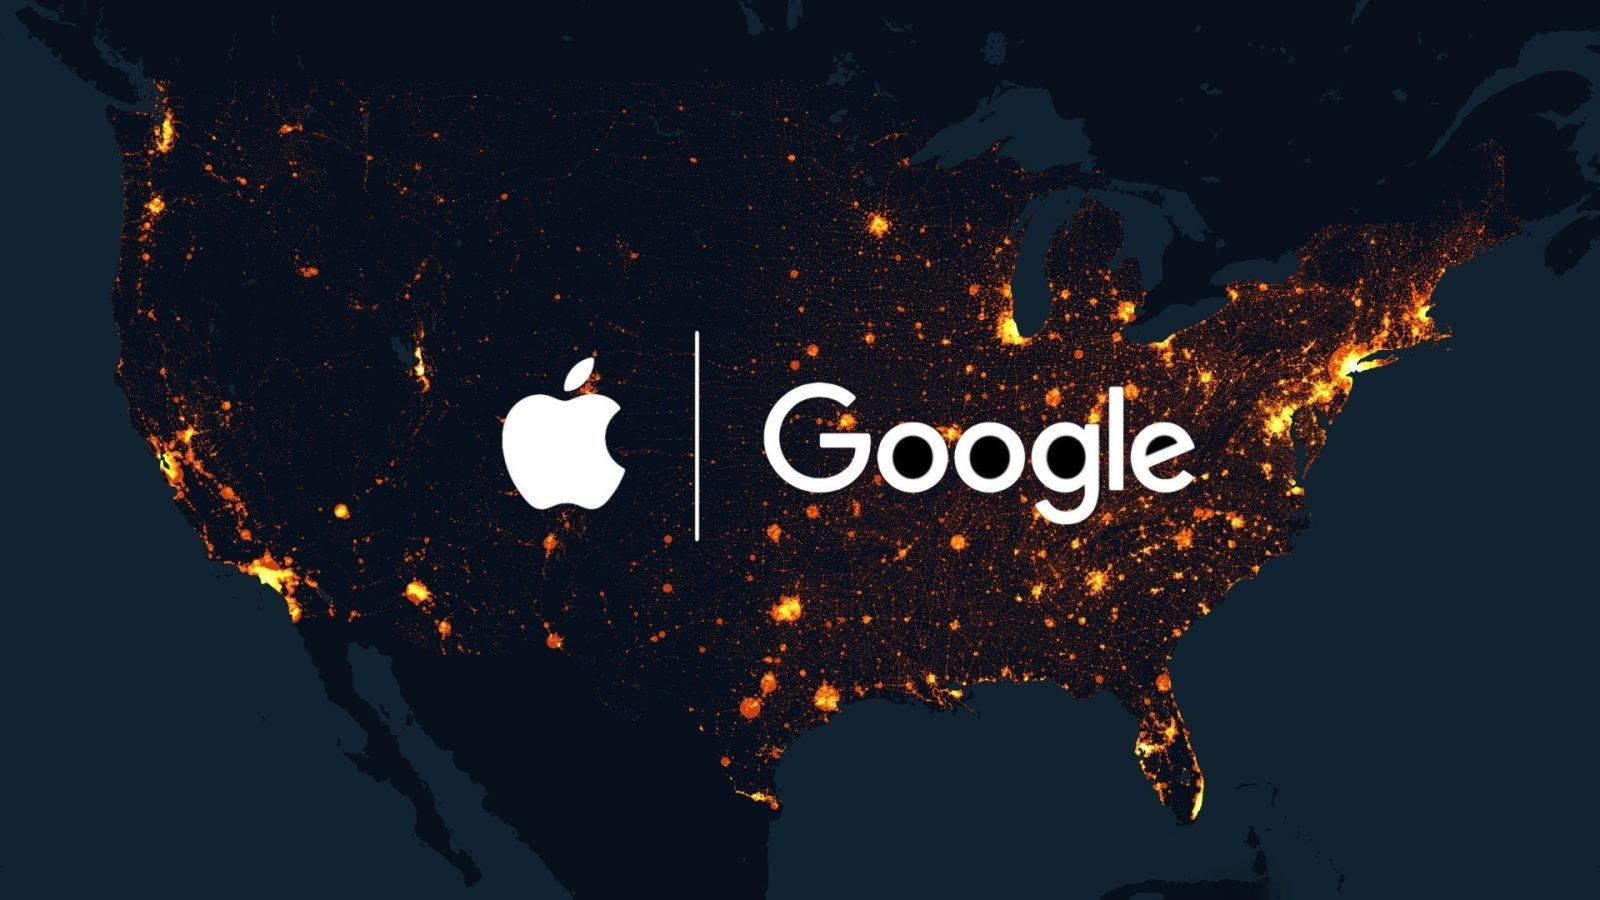

# 1. Business Understanding

## 1.0 Background

Ensemble Africa, an esteemed consultancy firm, collaborates closely with a prominent marketing agency driven by a singular objective: comprehending client product preferences through the lens of Twitter sentiments. This agency serves as a vital bridge between clients and their target audience, empowering them with consumer insights that are indispensable in today's competitive landscape.


The goal of this project is to develop a sentiment analysis model that accurately rates the sentiments of tweets about Apple and google products. By understanding the sentiments of customers' experiences, the marketing agency intends to  identify areas where they can improve their services so as to enhance customer satisfaction and loyalty.



## 1.1 Objectives
>- To build a specialized sentiment analysis model that can analyze twitter sentiments of google and apple products
>- To establish if there is any differences in twitter sentiments between apple and google product
>- To find out the inclusive sentiment view towards apple an google products from twitter
>- To investigate the recurring topics of interest associated with negative or positive sentiments as seen by google and apple brands

## 1.2 Stakeholders

Our stakeholder is a marketting agency seeking to understand client product needs based on their twitter sentiments. The client's aim is to also offer consumer insights with regards to the positive and negative mentions of the Google and Apple products.

## 1.3 Hypothesis

**Null Hypothesis (H0):** Our model's ability to accurately classify tweet sentiments between Google and Apple products is not significantly different from random chance.

**Alternative Hypothesis (Ha):** Our model's ability to accurately classify tweet sentiments between Google and Apple products is significantly better than random chance.

# 2. Data Understanding

The dataset used in this project,sourced from https://data.world/crowdflower/brands-and-product-emotions, consists of 3 columns and 9093 rows. The columns include;


*   tweet_text : contains the text of tweets.
*   emotion_in_tweet_is_directed_at : column provides insights into the emotions expressed.
*   is_there_an_emotion_directed_at_a_brand_or_product : indicates the brand/product the emotion is directed at.


### 2.1 Import Libraries

*  Install the English language model for spaCy, as it is essential for conducting natural language processing tasks using the spaCy library.





In [ ]:
# !python -m spacy download en

*   Offers a range of tools and utilities designed for handling text data and seamlessly integrating it into machine learning workflows based on the PyTorch framework.



In [ ]:
# !pip install torchtext

In [ ]:
import pandas as pd
import numpy as np
import warnings
import random as rnd

import re
import string
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go

import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB

import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords

from tqdm import tqdm

warnings.filterwarnings("ignore")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',100)
pd.set_option('display.max_colwidth', None)

### 2.2 Load dataset

In [ ]:

# file_path = "/tweet_product_company.csv"
file_path = '/content/tweet_product_company.csv'

tweets = pd.read_csv(file_path, encoding='ISO-8859-1')
tweets.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive emotion


In [ ]:
tweets.tail()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your regularly scheduled #sxsw geek programming with big news {link} #google #circles",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported potential AE. Yet FDA relies on physicians. &quot;We're operating w/out data.&quot; #sxsw #health2dev",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their time fell back an hour this weekend. Of course they were the New Yorkers who attended #SXSW.,NaN,No emotion toward brand or product
9092,Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @mention Google Tests ÛÏCheck-in OffersÛ At #SXSW {link},NaN,No emotion toward brand or product


*   Upon loading the dataset and examining its initial and final five rows, we verified that its data maintains consistency.




In [ ]:
def data_understanding(tweets):
    # Shape of the dataset
    display(f"The shape of the dataset is: {tweets.shape}")
    print('*'*69, '\n')

    # Basic info abt the dataframe
    tweets.info()
    print('*'*69, '\n')

    # Value count in the target column
    emotion_count = tweets['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()
    print(emotion_count, '\n')
    print('*'*69)

    # Check for Null
    print("Null Values", '\n')
    display(tweets.isnull().sum())
    print('*'*69, '\n')

    # Columns present
    print("Available columns", '\n')
    display(tweets.columns)

    display(tweets.describe())

data_understanding(tweets)

'The shape of the dataset is: (9093, 3)'

********************************************************************* 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB
********************************************************************* 

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64 

***************************************************************

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

********************************************************************* 

Available columns 



Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #sxsw,iPad,No emotion toward brand or product
freq,5,946,5389


**The following observations were made;**

*   The dataset contains a total of 9093 rows and 3 columns.
*  The columns are labeled 'tweet_text', 'emotion_in_tweet_is_directed_at', and 'is_there_an_emotion_directed_at_a_brand_or_product'.
*   The 'is_there_an_emotion_directed_at_a_brand_or_product' column has four unique values: 'No emotion toward brand or product', 'Positive emotion', 'Negative emotion', and "I can't tell".
*  The 'emotion_in_tweet_is_directed_at' column has nine unique values.

*   Null values are present in the 'tweet_text' and 'emotion_in_tweet_is_directed_at' columns. The 'tweet_text' column has one null value, and the 'emotion_in_tweet_is_directed_at' column has 5802 null values.




# 3. Data Cleaning and Preparation

In [ ]:
# Rename the columns
tweets.rename(columns={'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiments'}, inplace=True)
tweets.rename(columns={'emotion_in_tweet_is_directed_at': 'brand'}, inplace=True)
tweets.rename(columns={'tweet_text': 'tweet'}, inplace=True)


*   Changing column names enhances the dataset's readability, clarity, and user-friendliness. It contributes to smoother data analysis and facilitates sharing insights, as the new names accurately represent the content of the columns.





In [ ]:
# Check for duplicate rows based on "tweet_text"
duplicates = tweets[tweets.duplicated(subset='tweet', keep=False)]

# Display the duplicate rows
print("Total Number of Duplicate Rows:", len(duplicates))
print("Duplicate Rows:")
duplicates.sample(21)

Total Number of Duplicate Rows: 46
Duplicate Rows:


,tweet,brand,sentiments
3814,Win free iPad 2 from webdoc.com #sxsw RT,iPad,Positive emotion
5879,"RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw",NaN,No emotion toward brand or product
5885,"RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw",NaN,No emotion toward brand or product
3812,Win free iPad 2 from webdoc.com #sxsw RT,NaN,No emotion toward brand or product
9,Counting down the days to #sxsw plus strong Canadian dollar means stock up on Apple gear,Apple,Positive emotion
24,Really enjoying the changes in Gowalla 3.0 for Android! Looking forward to seeing what else they &amp; Foursquare have up their sleeves at #SXSW,Android App,Positive emotion
2232,Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #sxsw,NaN,No emotion toward brand or product
6576,RT @mention RT @mention It's not a rumor: Apple is opening up a temporary store in downtown Austin for #SXSW and the iPad 2 launch {link},NaN,No emotion toward brand or product
8747,Need to buy an iPad2 while I'm in Austin at #sxsw. Not sure if I'll need to Q up at an Austin Apple store?,iPad,Positive emotion
6292,RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #sxsw,Google,Positive emotion


> The duplicates are majorly retweets, which convey same meaning

In [ ]:
#drop the duplicates
tweets_df = tweets.drop_duplicates(subset='tweet')
tweets_df.shape

(9066, 3)

In [ ]:
# lowercase all characters
tweets_df['tweet'] =tweets_df['tweet'].str.lower()
tweets_df['brand'] = tweets_df['brand'].str.lower()
tweets_df['sentiments'] = tweets_df['sentiments'].str.lower()

In [ ]:
tweets_df.sample(10)

,tweet,brand,sentiments
7740,#sxsw #personalcloud google 'create great design principles' for great tips,NaN,positive emotion
6583,rt @mention rt @mention love it. @mention #sxsw: &quot;apple comes up with cool technology no one's ever heard of because they don't go to conferences&quot;,apple,positive emotion
1211,"on my way to &quot;ipad design headaches.&quot; not sure it's bloggable, but i'm sure it will be interesting! #sxsw {link}",ipad,positive emotion
2959,wew rt @mention new #ubersocial for #iphone now in the app store includes uberguide to #sxsw sponsored by (cont) {link},ipad or iphone app,positive emotion
5025,rt @mention,NaN,no emotion toward brand or product
2213,melissa mayer of google says credit card companies can predict a divorce with 98% accuracy based on spending patterns alone. #sxsw #guardian,NaN,no emotion toward brand or product
7743,saw my first google maps street view car! #sxsw {link},NaN,no emotion toward brand or product
6646,"rt @mention see a member of our team with this bag at #sxsw, show them your wolfram app &amp; get a w|a case for your iphone! {link}",NaN,no emotion toward brand or product
8365,"yes, i hate the fanboys. still valid tho- to those that waited for the ipad2 instead of enjoying #sxsw: {link} via @mention",NaN,no emotion toward brand or product
4829,"here we go again! rt @mention google to launch major new social network called circles, possibly today {link} #sxsw",NaN,no emotion toward brand or product


# Practise EDA on NLP

In [ ]:
sample = "Your client is hereby instructed to cease the collection of all facial recognition data and iris scans, from your subscribers. This cessation should be implemented without delay and should include all ongoing and future data processing activities,” said Rose Mosero, in a letter to Tools for Humanity that outlined the concerns. The letter, addressed to Ariana Issaias of Coulson Harney (Bowmans), the law firm representing the crypto startup, also restricted Worldcoin from processing the collected data further and instructed the safe storage of collected information."

sample


'Your client is hereby instructed to cease the collection of all facial recognition data and iris scans, from your subscribers. This cessation should be implemented without delay and should include all ongoing and future data processing activities,” said Rose Mosero, in a letter to Tools for Humanity that outlined the concerns. The letter, addressed to Ariana Issaias of Coulson Harney (Bowmans), the law firm representing the crypto startup, also restricted Worldcoin from processing the collected data further and instructed the safe storage of collected information.'

In [ ]:
len(sample)

570

In [ ]:
# unique words
len(set(sample.split(' ')))

65

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# lower case
cleanup =[word.lower() for word in sample.split(' ')]

In [ ]:
# removing punctuation
cleanup = [s.translate(str.maketrans('', '', string.punctuation))\
           for s in cleanup]

print(cleanup)

['your', 'client', 'is', 'hereby', 'instructed', 'to', 'cease', 'the', 'collection', 'of', 'all', 'facial', 'recognition', 'data', 'and', 'iris', 'scans', 'from', 'your', 'subscribers', 'this', 'cessation', 'should', 'be', 'implemented', 'without', 'delay', 'and', 'should', 'include', 'all', 'ongoing', 'and', 'future', 'data', 'processing', 'activities”', 'said', 'rose', 'mosero', 'in', 'a', 'letter', 'to', 'tools', 'for', 'humanity', 'that', 'outlined', 'the', 'concerns', 'the', 'letter', 'addressed', 'to', 'ariana', 'issaias', 'of', 'coulson', 'harney', 'bowmans', 'the', 'law', 'firm', 'representing', 'the', 'crypto', 'startup', 'also', 'restricted', 'worldcoin', 'from', 'processing', 'the', 'collected', 'data', 'further', 'and', 'instructed', 'the', 'safe', 'storage', 'of', 'collected', 'information']


In [ ]:
# Stopwords
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
stopwords.words('greek')[:3]

['αλλα', 'αν', 'αντι']

In [ ]:
stops = [token for token in cleanup if token in stopwords.words('english')]
stops[:10]

['your', 'is', 'to', 'the', 'of', 'all', 'and', 'from', 'your', 'this']

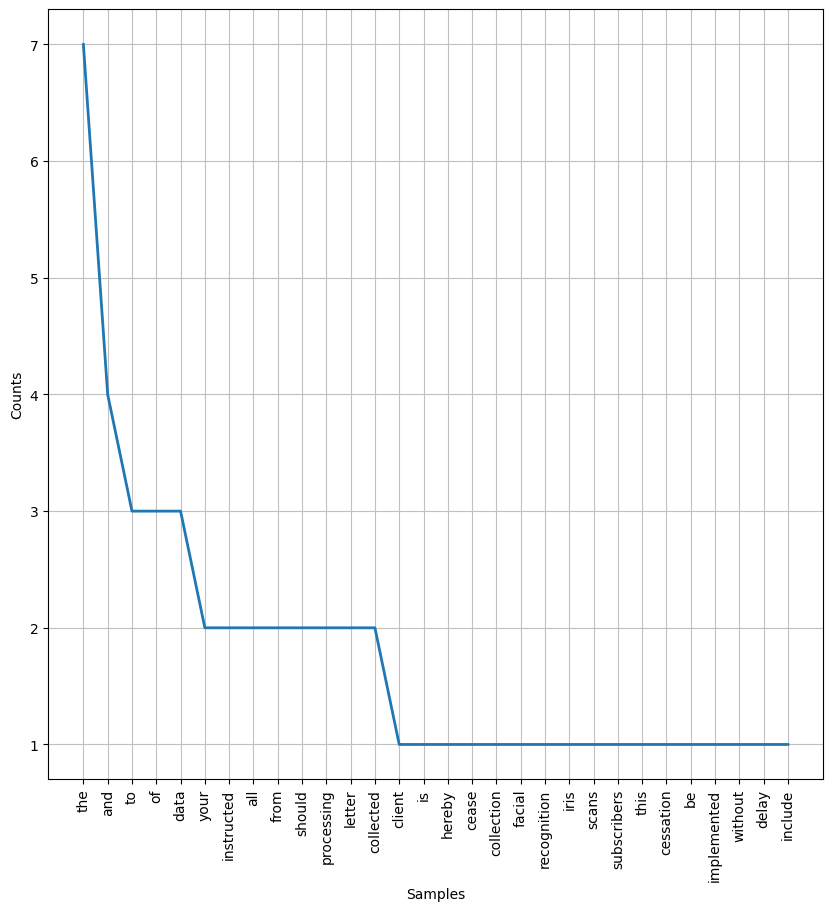

In [ ]:
fdist = FreqDist(cleanup)
plt.figure(figsize=(10,10))
fdist.plot(30);

In [ ]:
cleanup = [token for token in cleanup if\
           token not in stopwords.words('english')]

In [ ]:
cleanup[:10]

['client',
 'hereby',
 'instructed',
 'cease',
 'collection',
 'facial',
 'recognition',
 'data',
 'iris',
 'scans']

In [ ]:
# add words to the stopword list
custom_sw = stopwords.words('english')
custom_sw.extend(["i'd"])
custom_sw[-10:]

["shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't",
 "i'd"]

In [ ]:
sw = stopwords.words('english')
cleanup = [token for token in cleanup if token not in sw]

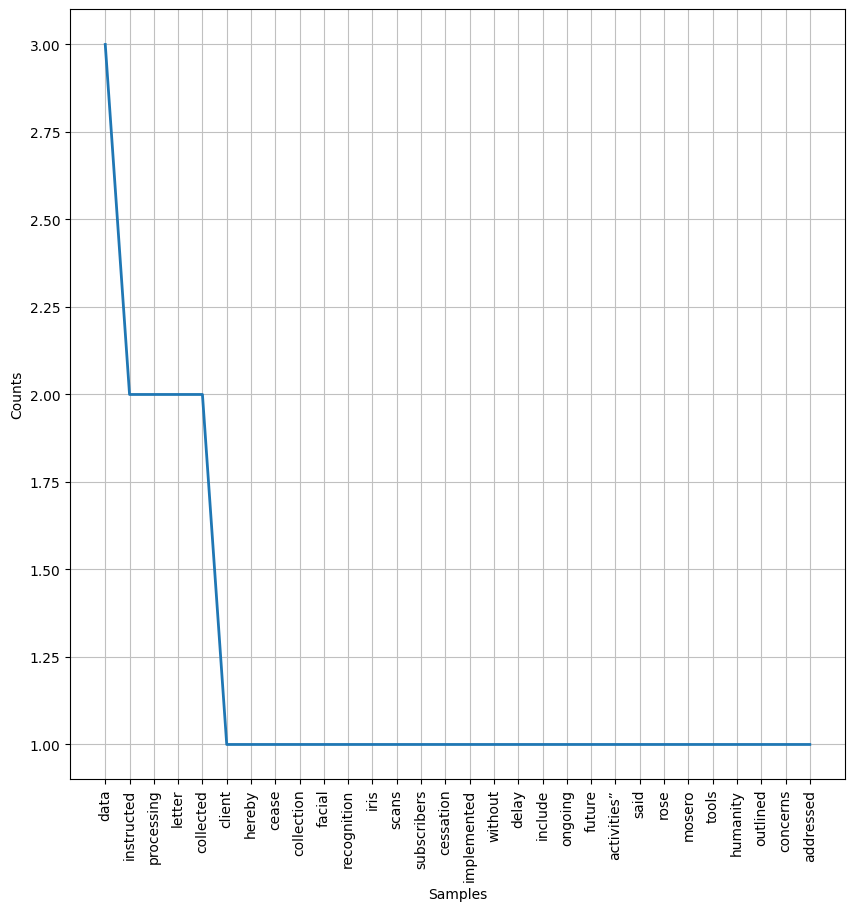

In [ ]:
fdist = FreqDist(cleanup)
plt.figure(figsize=(10,10))
fdist.plot(30);

In [ ]:
#  using RegExTokenizer
from nltk import RegexpTokenizer

pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
tokenizer = RegexpTokenizer(pattern)
output = tokenizer.tokenize(sample)

In [ ]:
print(output)

['Your', 'client', 'is', 'hereby', 'instructed', 'to', 'cease', 'the', 'collection', 'of', 'all', 'facial', 'recognition', 'data', 'and', 'iris', 'scans', 'from', 'your', 'subscribers', 'This', 'cessation', 'should', 'be', 'implemented', 'without', 'delay', 'and', 'should', 'include', 'all', 'ongoing', 'and', 'future', 'data', 'processing', 'activities', 'said', 'Rose', 'Mosero', 'in', 'a', 'letter', 'to', 'Tools', 'for', 'Humanity', 'that', 'outlined', 'the', 'concerns', 'The', 'letter', 'addressed', 'to', 'Ariana', 'Issaias', 'of', 'Coulson', 'Harney', 'Bowmans', 'the', 'law', 'firm', 'representing', 'the', 'crypto', 'startup', 'also', 'restricted', 'Worldcoin', 'from', 'processing', 'the', 'collected', 'data', 'further', 'and', 'instructed', 'the', 'safe', 'storage', 'of', 'collected', 'information']


In [ ]:
output = [token.lower() for token in output]
output = [token for token in output if token not in sw]


In [ ]:
output[:10]

['client',
 'hereby',
 'instructed',
 'cease',
 'collection',
 'facial',
 'recognition',
 'data',
 'iris',
 'scans']

# 3nD

#### <b> Handling Null

In [ ]:
 #viewing null values
 tweets_df.isnull().sum()

tweet            1
brand         5786
sentiments       0
dtype: int64

####Tweet column

In [ ]:
#view the tweet column with null value
tweets_df[tweets_df['tweet'].isnull()]

,tweet,brand,sentiments
6,NaN,NaN,no emotion toward brand or product


In [ ]:
# drop the tweet column with no tweet as it tells no info
tweets_df = tweets_df.dropna(subset=['tweet'])

In [ ]:
tweets_df.isnull().sum()

tweet            0
brand         5785
sentiments       0
dtype: int64

#### Brand Column

In [ ]:
null_values = tweets_df[tweets_df['brand'].isnull()]
null_values.sample(8)

,tweet,brand,sentiments
5545,"rt @mention beautiful day in #austin! come by and grab a slice or two. if you check in on #google, you can get a deal. #sxswi #sxsw",NaN,no emotion toward brand or product
7574,google circles could potentially be unveiled today at #sxsw. could google get 'social' right this time? your opinion? {link},NaN,no emotion toward brand or product
6596,"rt @mention rt @mention per this rumor, google may preview its big social strategy @mention '80s-themed costume party at #sxsw. yep. {link} #cnet",NaN,no emotion toward brand or product
8281,"it's about that time. time to restock business cards, charge the ipad/cell phone/camera, set alarms, &amp; sleep off the day's #sxsw overload.",NaN,no emotion toward brand or product
2436,"google and aclu are buddies?ûï@mention google to launch major new social network called circles, possibly today {link} #sxswû",NaN,no emotion toward brand or product
4862,it is also limited in its abilities. its a balance. rt @mention @mention an ipad is cheaper than most laptops. #newsapps #sxsw,NaN,i can't tell
6457,rt @mention q&amp;a with #bing &amp; #google. let the games begin #qagb #sxsw,NaN,no emotion toward brand or product
8456,"shoe on other foot. newspapers always chasing young readers. at #sxsw, young developers pack panel on ipad design for boomers. #yourmom",NaN,no emotion toward brand or product


> Identify the product category (e.g., 'iPad or iPhone App', 'Android App') for tweets that have Null values by looking for specific keywords associated with each product category in the tweet text. If relevant keywords are found, the product category is updated for that tweet. This helps in better categorizing tweets based on their content.

In [ ]:
# The brand column has many null. Lets handle that

keywords = ['google', 'apple', 'ipad', 'android', 'iphone', 'itunes']

def find_brand(text):
    if isinstance(text, str):
        lower_text = text.lower()
        for keyword in keywords:
            if keyword in lower_text:
                return keyword
    return None

tweets_df['brand'] = tweets_df.apply(lambda row: row['brand'] if not pd.isna(row['brand']) else find_brand(row['tweet']), axis=1)

In [ ]:
# check how many Null are remaining
tweets_df.isnull().sum()

tweet           0
brand         704
sentiments      0
dtype: int64

In [ ]:
# view rows in brand column that have null values (NaN)
rows_with_nan_brand= tweets_df[pd.isna(tweets_df['brand'])]
rows_with_nan_brand.sample(25)

,tweet,brand,sentiments
1094,@mention so u r coming #sxsw :) dwnld #groundlink app &amp; ride for $10 in austin during sxswi{link} see us booth 437,None,no emotion toward brand or product
4914,+1- lots of fun. rt @mention @mention #hollergram app is killing it at #sxsw {link},None,no emotion toward brand or product
7643,"aight, here's my wed + thurs list of #sxsw possibilities: {link} i hope to see all my twitter buds out + about atx this week!",None,no emotion toward brand or product
8520,mom (@mention quick - apply for a job @mention they need help identifying this bird through search! #sxsw {link},None,no emotion toward brand or product
5558,rt @mention best thing abt @mention for #sxsw? great food &amp; drink w/patio &amp; plenty of free parking | 5-10 min n of &quot;the mess&quot; {link},None,no emotion toward brand or product
619,"@mention hello! enjoy #sxsw and ride anywhere in austin for $10 . download the #groundlink app, {link} booth 437",None,positive emotion
4700,@mention not launching any products at #sxsw but they are doing plenty else. join them for #h4ckers &amp; 80s dancing.{link},None,no emotion toward brand or product
2713,get in the season with clover touch:\n{link} #games #stpatrick,None,no emotion toward brand or product
8843,wanna know where the fast cellular signal is at #sxsw? get coverage: austin for ios (free) for detailed maps - {link},None,no emotion toward brand or product
6719,"rt @mention thanks rt @mention if you're trying to contact friends or family in #japan, @mention has created a person finder: {link} #sxsw",None,no emotion toward brand or product


In [ ]:
# Since they can't be tagged to any brand we label them Unknown
tweets_df['brand'] = tweets_df['brand'].fillna('unknown')

In [ ]:
tweets_df.isnull().sum()

tweet         0
brand         0
sentiments    0
dtype: int64

In [ ]:
#view the unique values in brand column
tweets_df.brand.unique()

array(['iphone', 'ipad or iphone app', 'ipad', 'google', 'android',
       'apple', 'android app', 'other google product or service',
       'unknown', 'itunes', 'other apple product or service'],
      dtype=object)

#### Sentiments column

In [ ]:
tweets_df['sentiments'].value_counts()

no emotion toward brand or product    5372
positive emotion                      2968
negative emotion                       569
i can't tell                           156
Name: sentiments, dtype: int64

In [ ]:
# Understanding the 'I can't tell' sentiments
unknown_sentiments = tweets_df[tweets_df['sentiments'] == "i can't tell"]
unknown_sentiments.sample(9)

,tweet,brand,sentiments
4862,it is also limited in its abilities. its a balance. rt @mention @mention an ipad is cheaper than most laptops. #newsapps #sxsw,ipad,i can't tell
1908,"o no,not again {link} google circles juwan howard #sxsw",google,i can't tell
3939,i would give my apple stock to be more like @mention {link} #sxsw,apple,i can't tell
2334,saw a bunch of security guards playing with ipads at the apple store after hours last night #sxsw {link},apple,i can't tell
341,the queue at the apple store in austin is four blocks long. crazy stuff! #sxsw,apple,i can't tell
1391,"wow folks, make sure that iphone ringer is turned all the way up when u have to be up pre-sunrise for a flight. #internalalarmclockftw #sxsw",iphone,i can't tell
8831,geez #sxsw people are eating this up. another line outside the apple store for ipad 2 in austin {link},ipad,i can't tell
7237,checking out mistakes i made building netflix for the iphone at #sxsw.\n{link} #netflixiphone,iphone,i can't tell
1781,the ipad 2 is the also a cartoonishly large digital camera. #sxsw #cstejas {link},ipad,i can't tell


We decided to drop the 'I can't tell' because we wanted to classify the sentiments in 'positive' , 'negative' and 'no emotion' as this will help us enhance the quality of our analysis.

In [ ]:
# Drop the columns containing "i can't tell"
tweets_df = tweets_df[tweets_df['sentiments'] != "i can't tell"]

In [ ]:
tweets_df['sentiments'].value_counts()

no emotion toward brand or product    5372
positive emotion                      2968
negative emotion                       569
Name: sentiments, dtype: int64

In [ ]:
#Hashtags
def hashtag_count(string):
    # Split the string into words
    words = string.split()
    # Create a list of hashtags
    hashtags = [word for word in words if word.startswith('#')]
    # Return list of hashtags
    return hashtags


In [ ]:
   hasht = []

# Loop through each row in the "tweet" column
for index, row in tweets_df.iterrows():
    tweet = row['tweet']
    hashtags = hashtag_count(tweet)  # Get list of hashtags
    hasht.extend(hashtags)  # Extend the list with hashtags from the current tweet

In [ ]:
pd.Series(hasht).value_counts().head(20)


#sxsw          7672
#sxsw.          406
#apple          396
#sxswi          298
#google         297
#ipad2          275
#iphone         255
#ipad           249
#sxsw?          189
#sxsw,          168
#sxsw:          143
#sxsw!          129
#android        119
#austin          96
#tech            87
#circles         78
#sxswû         69
#ubersocial      68
#gsdm            62
#tapworthy       52
dtype: int64

> The hashtags are majorly for the trending topics where we see SXSW, an annual tech and media event was largely talked about

In [ ]:
example = tweets_df['tweet'][0]

tokens = nltk.word_tokenize(example)
tokens[:10]

['.', '@', 'wesley83', 'i', 'have', 'a', '3g', 'iphone', '.', 'after']

In [ ]:
# part of speech tagging
tagged = nltk.pos_tag(tokens)
tagged[:7]

[('.', '.'),
 ('@', 'CC'),
 ('wesley83', 'NN'),
 ('i', 'NNS'),
 ('have', 'VBP'),
 ('a', 'DT'),
 ('3g', 'CD')]

In [ ]:
# named entity recognition (NER) - identifying named entities in text, such as people, organizations, locations, and so on.
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  ./.
  @/CC
  wesley83/NN
  i/NNS
  have/VBP
  a/DT
  3g/CD
  iphone/NN
  ./.
  after/IN
  3/CD
  hrs/NN
  tweeting/VBG
  at/IN
  #/#
  rise_austin/NN
  ,/,
  it/PRP
  was/VBD
  dead/JJ
  !/.
  i/JJ
  need/VBP
  to/TO
  upgrade/VB
  ./.
  plugin/VB
  stations/NNS
  at/IN
  #/#
  sxsw/NN
  ./.)


### Observations
>- @wesley83: a Twitter handle
>- 3g iphone: a product
>- '#rise_austin' : a hashtag
>- '#sxsw' : a hashtag

##*Exploratory Data Analysis*

We will be visually and statistically examining the distribution of sentiment labels and exploring trends in textual data, EDA helps uncover patterns, potential biases, and insights within the dataset.


###1. Univariate

<Axes: xlabel='tweet', ylabel='Count'>

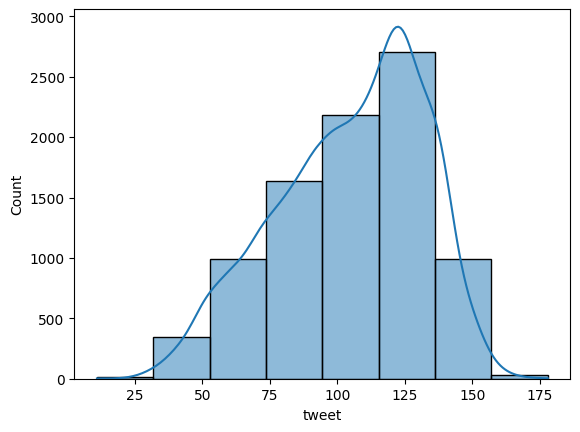

In [ ]:
# distribution of text: sentense length analysis
sns.histplot(tweets_df['tweet'].str.len(), bins=8, kde=True)

The distribution of the texts seem to be left skewed
From above histogram, the tweets are comprised of around 29-160 characters

<Axes: xlabel='sentiments', ylabel='count'>

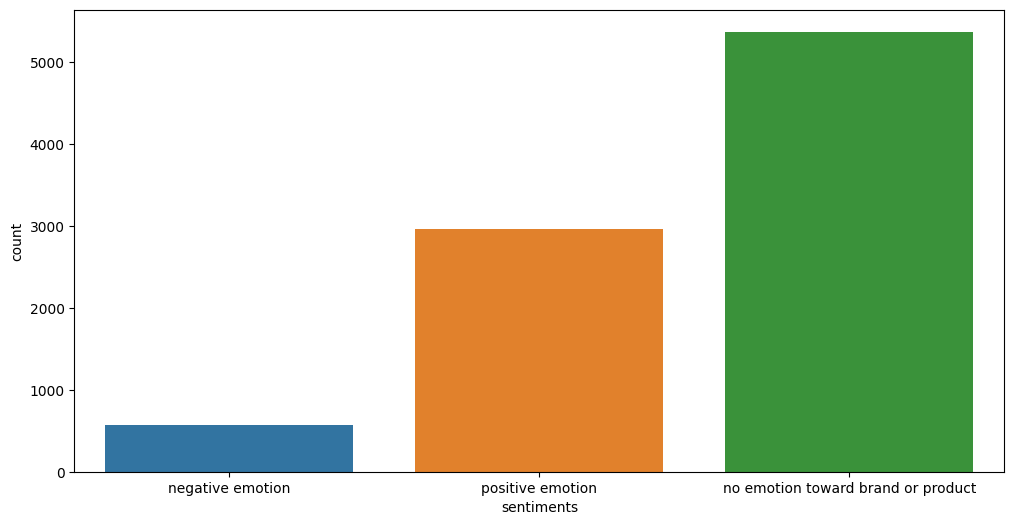

In [ ]:
#A plot that shows the distribution of customer sentiments
plt.figure(figsize=(12,6))
sns.countplot(x='sentiments',data=tweets_df)

In [ ]:
temp = tweets_df['sentiments'].value_counts().reset_index()
temp.columns = ['sentiments', 'tweet']

fig = go.Figure(go.Funnelarea(
    text=temp.sentiments,
    values=temp.tweet,
    title={"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
))

# Set the width and height of the figure
fig.update_layout(width=700, height=500)

fig.show()

> 'No emotion' is the biggest chunk with around 60% followed by 'Positive emotion'

#### 2.Bivariate Analysis

Sentiment vs. Product
To analyze how sentiment (positive, negative, neutral) varies across different products (Apple, Google) mentioned in the tweets. This can help you understand how customers perceive each company's products.

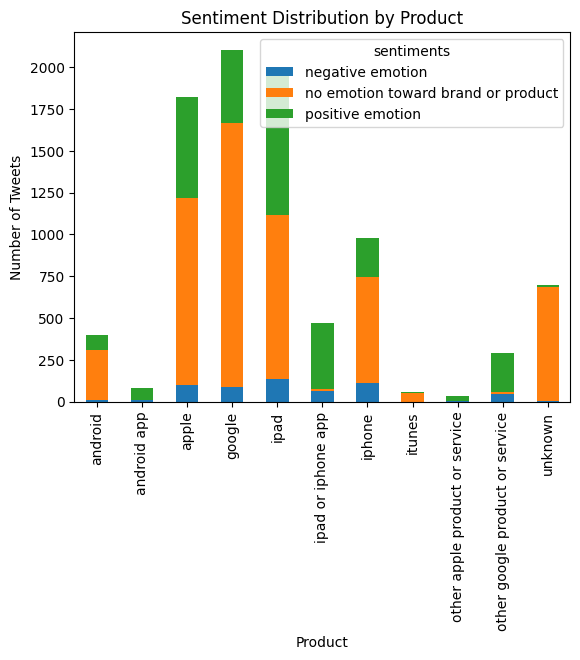

In [ ]:
product_column = 'brand'
sentiment_column = 'sentiments'

# Group the data by product and sentiment, and calculate the counts
sentiment_counts = tweets_df.groupby([product_column, sentiment_column]).size().unstack()

# Plot the sentiment distribution for each product
sentiment_counts.plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution by Product')
plt.xlabel('Product')
plt.ylabel('Number of Tweets')

plt.show()

From the visualiatin above, the product that recieved most tweets is google. The common trend is that most customers don't hold any emotion towards the product.

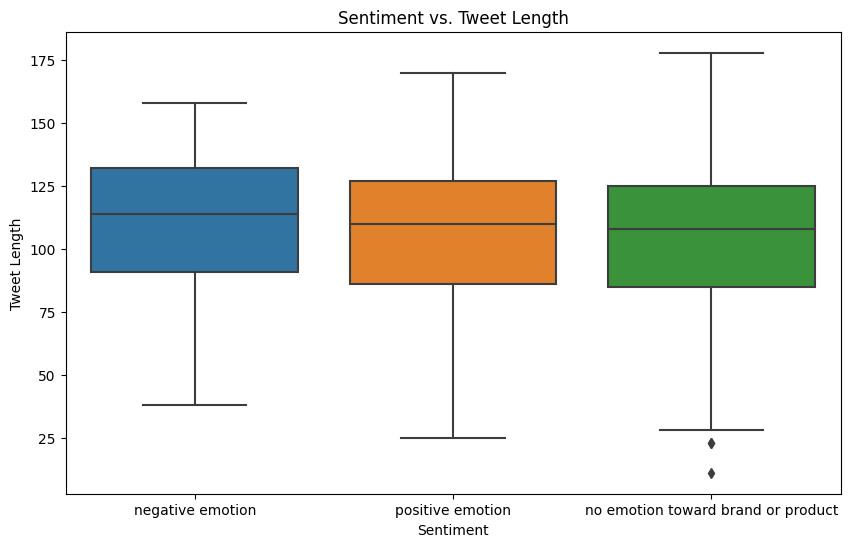

In [ ]:
sentiment_column = 'sentiments'
tweet_column = 'tweet'

# Calculate the length of each tweet
tweets_df['tweet_length'] = tweets_df[tweet_column].apply(lambda x: len(str(x)))

# Plot a box plot to visualize tweet length by sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x=sentiment_column, y='tweet_length', data=tweets_df)
plt.title('Sentiment vs. Tweet Length')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length')
plt.show()

From the box plots, we notice that most of the tweets whose lengths are longer hold negative sentiments. Also, the margine between the three sentiments is not too far apart. Therefore, it is safe to say that the length of the tweets is not enough to conclude on the customers' sentiments

## <b> Feature engineering

#### Brand column

In [ ]:
#mapping products to brands
dict_ = {'google': 'google',
        'ipad' : 'apple',
        'apple' : 'apple',
        'iphone' : 'apple',
        'unknown' : 'unknown',
        'ipad or iphone app': 'apple',
        'android' : 'google',
        'other google product or service' : 'google',
        'android app' : 'google',
        'other apple product or service' : 'apple'
        }

tweets_df['brand'] = tweets_df['brand'].map(dict_)

In [ ]:
tweets_df['brand'].value_counts(normalize = True)

apple      0.596341
google     0.324825
unknown    0.078834
Name: brand, dtype: float64

#### Emotion column

In [ ]:
emotion_dict = {
    'no emotion toward brand or product': 'neutral',
    'positive emotion': 'positive',
    'negative emotion': 'negative',
}

tweets_df['sentiments'] = tweets_df['sentiments'].map(emotion_dict).fillna("i can't tell")


In [ ]:
tweets_df['sentiments'].value_counts()

neutral     5372
positive    2968
negative     569
Name: sentiments, dtype: int64

In [ ]:
tweets_df.sample(10)

,tweet,brand,sentiments,tweet_length
7738,brace yourselves for the audio onslaught of #sxsw and enjoy this free music sampler from itunes: {link} #featuredartists,NaN,neutral,120
5101,rt @mention @mention @mention google to launch social networking site called circles - soon but not officially at #sxsw {link},google,neutral,126
4421,rt@mention first 19 apps to download for your #ipad 2 {link} #sxsw #in via @mention @mention,apple,neutral,92
1183,"of course they are, ha rt @mention @mention apple opening temporary store in austin for #sxsw &amp; ipad 2 launch {link}",apple,neutral,120
4488,"ipad2 launch at apple pop-up store in austin, texas for #sxsw {link}",apple,neutral,68
2945,thanks @mention for hosting this event #sxsw #sxswi #iwantacr48 {link},unknown,neutral,70
4288,look for me at sxsw. i'm the bearded guy in plaid on an iphone. #sxsw #nfusion,apple,neutral,80
5013,scenes from the austin sxsw ipad 2 pop-up shop -- here they are arriving! {link} #sxsw #cnnmoneysxsw,apple,positive,100
5875,"rt @mention google to launch major new social network called circles, possibly today ({link} #sxswi #sxsw via @mention",google,neutral,118
4298,yup. rt @mention @mention at #sxsw: &quot;apple comes up with cool technology no one's ever heard of because they don't go to conferences&quot;,apple,positive,143


## Pre-processing for NLP

#### (a) <b> Tokenization, Stemmer, and Stopwords Objects

Here, we will preprocesses textual data by cleaning and tokenizing it, perform sentiment-based word frequency analysis, and presents the results using bar plots and word clouds. These visualizations help gain insights into the most common words associated with different sentiments in the tweets.

The pre-processing steps include:-

Converting it to lowercase, removing URLs, specific words ("mention," "link," "2," "rt"), punctuation, and filtering out common words(stopwords) that don't contribute much to the analysis.







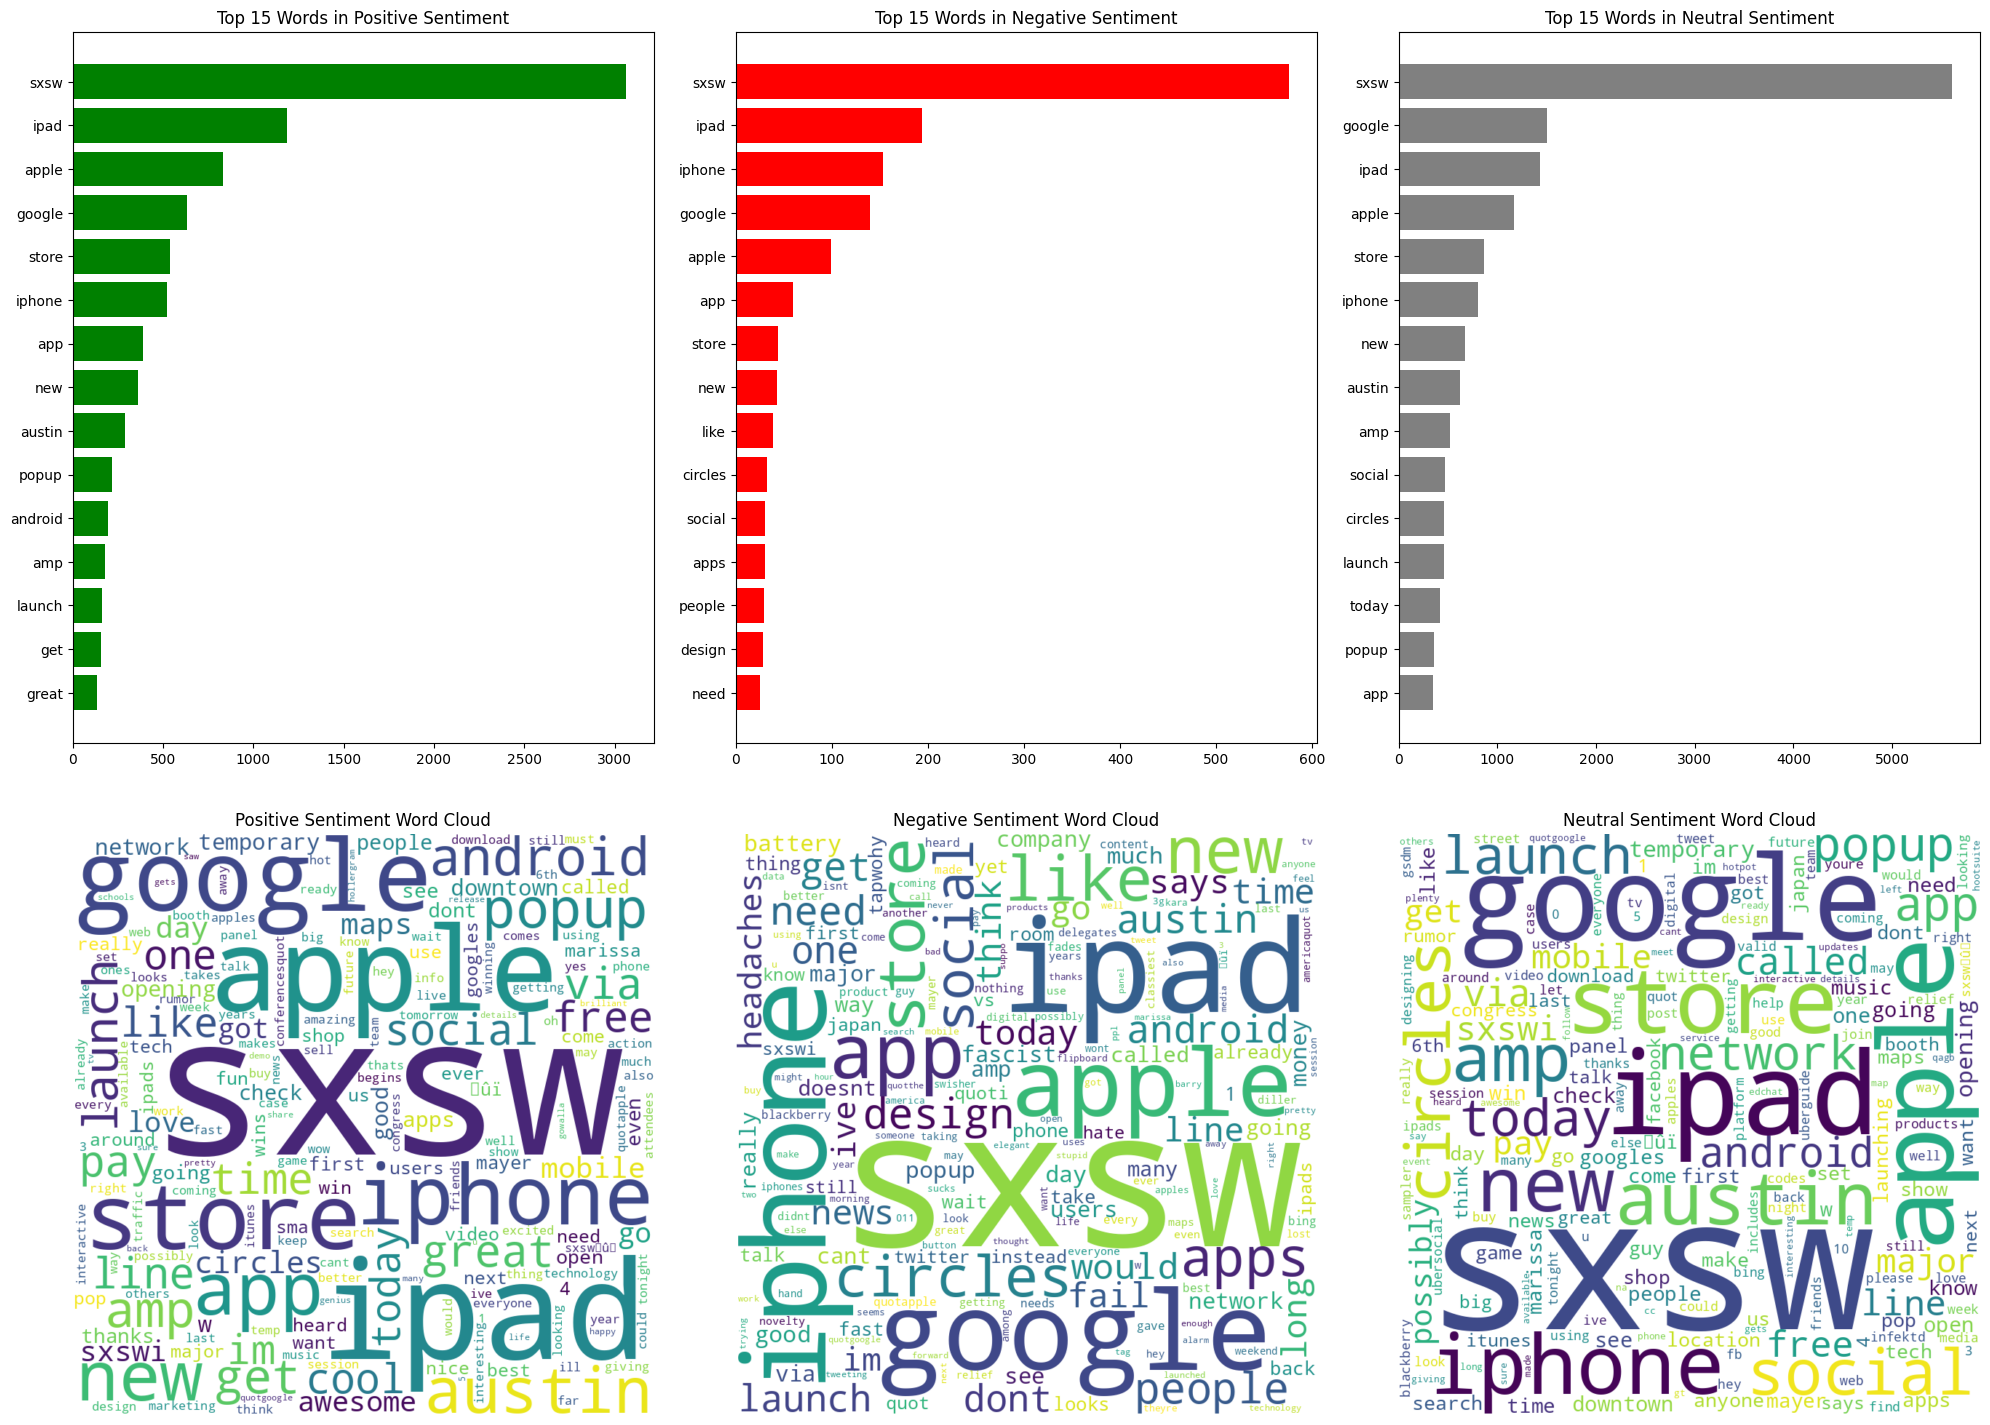

In [ ]:
from collections import Counter
from nltk.tokenize import word_tokenize

def preprocess_text(text, stopwords_list):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove "mention", "link", "2", "rt"
    text = text.replace("mention", "").replace("link", "").replace("2", "").replace("rt", "")

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize
    words = word_tokenize(text)

    # Remove stopwords
    words = [word for word in words if word not in stopwords_list]

    # Join the processed words back into a sentence
    processed_text = ' '.join(words)

    return processed_text

# Load NLTK stopwords
stopwords_list = set(stopwords.words('english'))

# create df2 for drawing word frequency plots
df2 = tweets_df.copy(deep=True)
df2['preprocessed_text'] = df2['tweet'].apply(lambda x: preprocess_text(x, stopwords_list))

# Separate preprocessed text for positive sentiment
positive_texts = df2[df2['sentiments'] == 'positive']['preprocessed_text']
positive_words = ' '.join(positive_texts).split()

# Separate preprocessed text for negative sentiment
negative_texts = df2[df2['sentiments'] == 'negative']['preprocessed_text']
negative_words = ' '.join(negative_texts).split()

# Separate preprocessed text for neutral sentiment
neutral_texts = df2[df2['sentiments'] == 'neutral']['preprocessed_text']
neutral_words = ' '.join(neutral_texts).split()

# Count word frequencies
positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)
neutral_word_counts = Counter(neutral_words)

# Get the top 15 words for each sentiment
top_positive_words = positive_word_counts.most_common(15)
top_negative_words = negative_word_counts.most_common(15)
top_neutral_words = neutral_word_counts.most_common(15)

# Extract words and frequencies for plotting
positive_words, positive_freq = zip(*top_positive_words)
negative_words, negative_freq = zip(*top_negative_words)
neutral_words, neutral_freq = zip(*top_neutral_words)

# Create plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))

# Plot positive sentiment word frequencies
axes[0, 0].barh(positive_words, positive_freq, color='green')
axes[0, 0].set_title('Top 15 Words in Positive Sentiment')
axes[0, 0].invert_yaxis()

# Plot negative sentiment word frequencies
axes[0, 1].barh(negative_words, negative_freq, color='red')
axes[0, 1].set_title('Top 15 Words in Negative Sentiment')
axes[0, 1].invert_yaxis()

# Plot neutral sentiment word frequencies
axes[0, 2].barh(neutral_words, neutral_freq, color='gray')
axes[0, 2].set_title('Top 15 Words in Neutral Sentiment')
axes[0, 2].invert_yaxis()

# Generate and display word clouds
wordcloud_positive = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(positive_word_counts)
wordcloud_negative = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(negative_word_counts)
wordcloud_neutral = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(neutral_word_counts)

axes[1, 0].imshow(wordcloud_positive, interpolation='bilinear')
axes[1, 0].set_title('Positive Sentiment Word Cloud')
axes[1, 0].axis('off')

axes[1, 1].imshow(wordcloud_negative, interpolation='bilinear')
axes[1, 1].set_title('Negative Sentiment Word Cloud')
axes[1, 1].axis('off')

axes[1, 2].imshow(wordcloud_neutral, interpolation='bilinear')
axes[1, 2].set_title('Neutral Sentiment Word Cloud')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

### Label encode sentiments

In [ ]:
# Label encode sentiments
from sklearn.preprocessing import LabelEncoder

# LabelEncoder for sentiments
sentiment_encoder = LabelEncoder()
df2['sentiments_encoded'] = sentiment_encoder.fit_transform(df2['sentiments'])

# Display the mapping of encoded labels
sentiment_mapping = dict(zip(sentiment_encoder.classes_, sentiment_encoder.transform(sentiment_encoder.classes_)))

print("Sentiment Mapping:", sentiment_mapping)

Sentiment Mapping: {'negative': 0, 'neutral': 1, 'positive': 2}


In [ ]:
df2.head()

,tweet,brand,sentiments,tweet_length,preprocessed_text,sentiments_encoded
0,".@wesley83 i have a 3g iphone. after 3 hrs tweeting at #rise_austin, it was dead! i need to upgrade. plugin stations at #sxsw.",apple,negative,127,wesley83 3g iphone 3 hrs tweeting riseaustin dead need upgrade plugin stations sxsw,0
1,"@jessedee know about @fludapp ? awesome ipad/iphone app that you'll likely appreciate for its design. also, they're giving free ts at #sxsw",apple,positive,139,jessedee know fludapp awesome ipadiphone app youll likely appreciate design also theyre giving free ts sxsw,2
2,@swonderlin can not wait for #ipad 2 also. they should sale them down at #sxsw.,apple,positive,79,swonderlin wait ipad also sale sxsw,2
3,@sxsw i hope this year's festival isn't as crashy as this year's iphone app. #sxsw,apple,negative,82,sxsw hope years festival isnt crashy years iphone app sxsw,0
4,"@sxtxstate great stuff on fri #sxsw: marissa mayer (google), tim o'reilly (tech books/conferences) &amp; matt mullenweg (wordpress)",google,positive,131,sxtxstate great stuff fri sxsw marissa mayer google tim oreilly tech booksconferences amp matt mullenweg wordpress,2


### Handling class Imbalance

The neutral tweets seem to be quite high in comparison to positive and negative tweets. Let's balance this to avoid our model being bias.

In [ ]:
df2['sentiments'].value_counts()

neutral     5372
positive    2968
negative     569
Name: sentiments, dtype: int64

In [ ]:
from sklearn.utils import resample
import pandas as pd

# Separate majority and minority classes
df_majority = df2[df2['sentiments_encoded'] == 1]
df_minority_0 = df2[df2['sentiments_encoded'] == 0]
df_minority_2 = df2[df2['sentiments_encoded'] == 2]

# Upsample the minority classes to match the majority class
df_minority_upsampled_0 = resample(df_minority_0, replace=True, n_samples=5372, random_state=42)
df_minority_upsampled_2 = resample(df_minority_2, replace=True, n_samples=5372, random_state=43)

# Combine the majority class with the upsampled minority classes
df_upsampled = pd.concat([df_majority, df_minority_upsampled_0, df_minority_upsampled_2]).reset_index(drop=True)

# Check the class distribution after oversampling
df_upsampled['sentiments_encoded'].value_counts()

1    5372
0    5372
2    5372
Name: sentiments_encoded, dtype: int64

In [ ]:
# df = df_upsampled[['final', 'sentiments_encoded']]
df = df_upsampled.copy(deep=True)
df

,tweet,brand,sentiments,tweet_length,preprocessed_text,sentiments_encoded
0,@teachntech00 new ipad apps for #speechtherapy and communication are showcased at the #sxsw conference http://ht.ly/49n4m #iear #edchat #asd,apple,neutral,140,teachntech00 new ipad apps speechtherapy communication showcased sxsw conference iear edchat asd,1
1,holler gram for ipad on the itunes app store - http://t.co/kfn3f5q (via @marc_is_ken) #sxsw,apple,neutral,92,holler gram ipad itunes app store via marcisken sxsw,1
2,"attn: all #sxsw frineds, @mention register for #gdgtlive and see cobra iradar for android. {link}",google,neutral,99,attn sxsw frineds register gdgtlive see cobra iradar android,1
3,anyone at #sxsw want to sell their old ipad?,apple,neutral,45,anyone sxsw want sell old ipad,1
4,anyone at #sxsw who bought the new ipad want to sell their older ipad to me?,apple,neutral,77,anyone sxsw bought new ipad want sell older ipad,1
...,...,...,...,...,...,...
16111,"finally got a new iphone 4 so i can tweet from my phone again! just in time for #sxsw gah, this has been torture. #addictedtotheinterwebs",apple,positive,137,finally got new iphone 4 tweet phone time sxsw gah toure addictedtotheinterwebs,2
16112,"marissa mayer, vp consumer products for google, doing great job at #sxsw. audience has tons of respect for what google is doing w/ location.",google,positive,140,marissa mayer vp consumer products google great job sxsw audience tons respect google w location,2
16113,"rt @mention sweet, apple's opening a pop-up shop in the scarbrough building on congress for the ipad 2 - {link} /via @mention #sxsw",apple,positive,131,sweet apples opening popup shop scarbrough building congress ipad via sxsw,2
16114,tm litle girl wants an ipad. guess i got to get her one. #sxsw (just checked into apple pop up store) {link},apple,positive,109,tm litle girl wants ipad guess got get one sxsw checked apple pop store,2


# Modelling

In our sentiment analysis project, we explored the effectiveness of various machine learning models in categorizing text-based data into sentiment classes. We employed a range of models to capture the nuances of sentiment expressed in textual content. These models included:

1. **Naives Bayes** - It's particularly suited for text classification tasks due to its simplicity and efficiency. Despite its "naive" assumption of independence between features, Naive Bayes can perform remarkably well on sentiment analysis tasks by capturing word occurrence patterns.
2. **Random Forest** - This ensemble learning technique offers robustness against overfitting and the ability to capture complex interactions in the data. Also it is really good in handling both numerical and categorical features, making them suitable for text-based sentiment analysis.
3. **Support Vector Machine (SVM)** - This powerful classification method that aims to find the optimal hyperplane that best separates data points of different classes. This will be great in text classification tasks like sentiment analysis to find the most discriminating features.
4. **Deep learning** - In sentiment analysis, deep neural networks have demonstrated their ability to capture contextual information and long-range dependencies in text. This will help automatically learn complex patterns and hierarchical representations from data.

Each of these models brings unique strengths to the task of sentiment analysis.

In order to start modeling we need to split your data into training and testing sets and vectorize our textual data into a format that machine learning algorithms can process.

In [ ]:
# Define our X and Y variables

# X is the feature matrix
X = df['preprocessed_text']

# y is the target variable
y = df['sentiments_encoded']

In [ ]:
# Vectorizing our textual feature into model friendly format

from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the "preprocessed_text" column
tfidf_matrix = tfidf_vectorizer.fit_transform(X)

# Get the feature names (words) in the TF-IDF matrix
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to a pandas DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

X = tfidf_df.values

In [ ]:
# Spliting our data into training, validation and test sets

from sklearn.model_selection import train_test_split

# Split the upsampled data into training, validation and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Check the class distribution in the training and testing sets
print(y_train.value_counts())
print(y_test.value_counts())
print(y_val.value_counts())

0    3761
1    3760
2    3760
Name: sentiments_encoded, dtype: int64
1    1612
2    1612
0    1611
Name: sentiments_encoded, dtype: int64
1    767
0    765
2    725
Name: sentiments_encoded, dtype: int64


In [ ]:
# Split the DataFrame into features and labels
# X = tfidf_df.values

# Display the first few rows of X and y
print("Features (X):")
print(X.shape)
print("\nLabels (y):")
print(y.shape)

Features (X):
(16116, 10292)

Labels (y):
(16116,)


# Modelling

Let's create  a train and evaluation function for our models.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

def train_and_evaluate_model(X_train_final, y_train_final, X_val, y_val, model, param_grid=None):

    if param_grid is not None:
        # Create the GridSearchCV object
        grid_search = GridSearchCV(model, param_grid, cv=3, verbose=1)
        grid_search.fit(X_train_final, y_train_final)

        # Use the best model from the grid search
        model = grid_search.best_estimator_

        # Print the best hyperparameters, best score, and best estimator
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_
        best_estimator = grid_search.best_estimator_
        print("Best Hyperparameters:", best_params)
        print("Best ROC-AUC Score:", best_score)
        print("Best Estimator:", best_estimator)

        # Fit the best model on the full training data
        model.fit(X_train_final, y_train_final)
    else:
        # If no hyperparameter tuning, simply fit the model on the training data
        model.fit(X_train_final, y_train_final)

    # Predictions on the training and test sets
    y_pred_train = model.predict(X_train_final)
    y_pred_val = model.predict(X_val)

    # Classification report for both train and test sets
    print("Classification Report (Training Set):")
    print(classification_report(y_train_final, y_pred_train))
    print("Classification Report (Val Set):")
    print(classification_report(y_val, y_pred_val))

    # Confusion matrix for both train and test sets
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    # Plot normalized confusion matrix for the training set
    ax1 = axes[0]
    cm_train = confusion_matrix(y_train_final, y_pred_train)
    cm_train_norm = cm_train.astype('float') / cm_train.sum(axis=1)[:, np.newaxis]
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train_norm, display_labels=np.unique(y_train_final))
    disp_train.plot(cmap=plt.cm.Blues, ax=ax1, values_format='.2f')
    ax1.set_title('Confusion Matrix (Training Set)')

    # Plot normalized confusion matrix for the val set
    ax2 = axes[1]
    cm_test = confusion_matrix(y_val, y_pred_val)
    cm_test_norm = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test_norm, display_labels=np.unique(y_val))
    disp_test.plot(cmap=plt.cm.Blues, ax=ax2, values_format='.2f')
    ax2.set_title('Confusion Matrix (Val Set)')

    plt.tight_layout()
    plt.show()

    # Return the trained model
    return model

## 1. Naive Bayes Classifier

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      2996
           1       0.86      0.78      0.82      2993
           2       0.84      0.87      0.86      3035

    accuracy                           0.87      9024
   macro avg       0.87      0.87      0.86      9024
weighted avg       0.87      0.87      0.86      9024

Classification Report (Val Set):
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       765
           1       0.73      0.59      0.65       767
           2       0.68      0.76      0.72       725

    accuracy                           0.75      2257
   macro avg       0.75      0.75      0.75      2257
weighted avg       0.75      0.75      0.75      2257



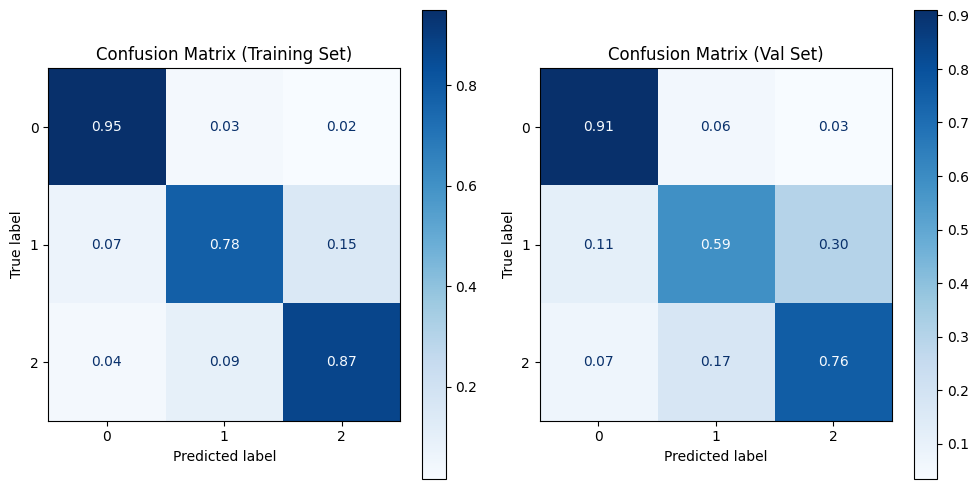

MultinomialNB()

In [ ]:
#Let's start by building a Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

# Initialize a Naive Bayes classifier
nb_classifier = MultinomialNB()

# Call the function with the Naive Bayes classifier
train_and_evaluate_model(X_train_final, y_train_final, X_val, y_val, nb_classifier)


The Naive Bayes baseline model performed well with an accuracy score of 87% on the training set vs 77% on the test set. Though the model has performed reasonably well on unseen data, the 10% difference with training set indicates potential issues with overfitting. Let's look at another model.

## 2. Random Forest

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2996
           1       0.98      0.96      0.97      2993
           2       0.97      0.98      0.97      3035

    accuracy                           0.98      9024
   macro avg       0.98      0.98      0.98      9024
weighted avg       0.98      0.98      0.98      9024

Classification Report (Val Set):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       765
           1       0.82      0.77      0.79       767
           2       0.79      0.82      0.81       725

    accuracy                           0.86      2257
   macro avg       0.86      0.86      0.86      2257
weighted avg       0.86      0.86      0.86      2257



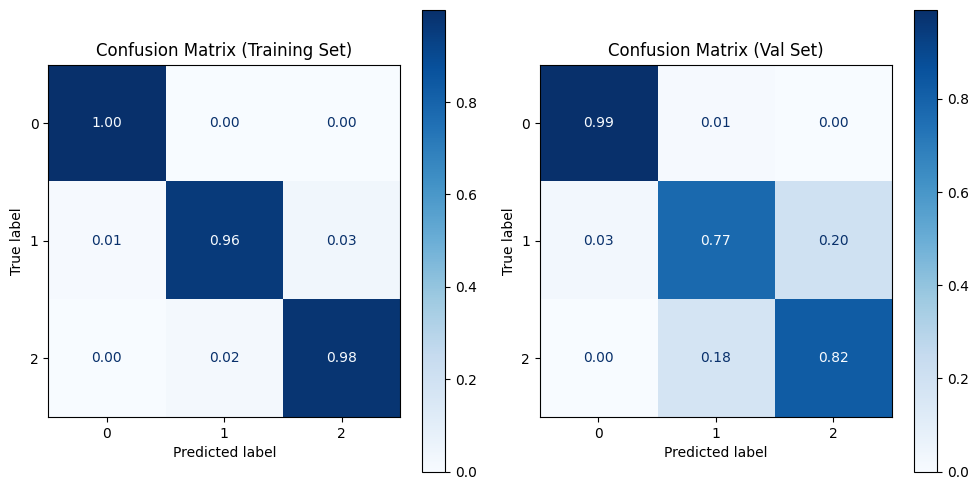

RandomForestClassifier(random_state=42)

In [ ]:
# Let's build a Random Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Call the function with the Random Forest classifier
train_and_evaluate_model(X_train_final, y_train_final, X_val, y_val, rf_classifier)

Our Random forest baseline model has peformed well on the training set with an accuracy of 98% and was also able to learn meaning ful patterns by having an 86% accuracy on unseen data. However, we can improve the model to better generalize the data and avoid issues with overfitting.

### Hyperparameter Tuning Random Forest

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
Best ROC-AUC Score: nan
Best Estimator: RandomForestClassifier(n_estimators=20, random_state=42)
Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2996
           1       0.98      0.95      0.97      2993
           2       0.96      0.98      0.97      3035

    accuracy                           0.98      9024
   macro avg       0.98      0.98      0.98      9024
weighted avg       0.98      0.98      0.98      9024

Classification Report (Val Set):
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       765
           1       0.82      0.78      0.80       767
           2       0.81      0.81      0.81       725

    accuracy                           0.87      2257
   macro a

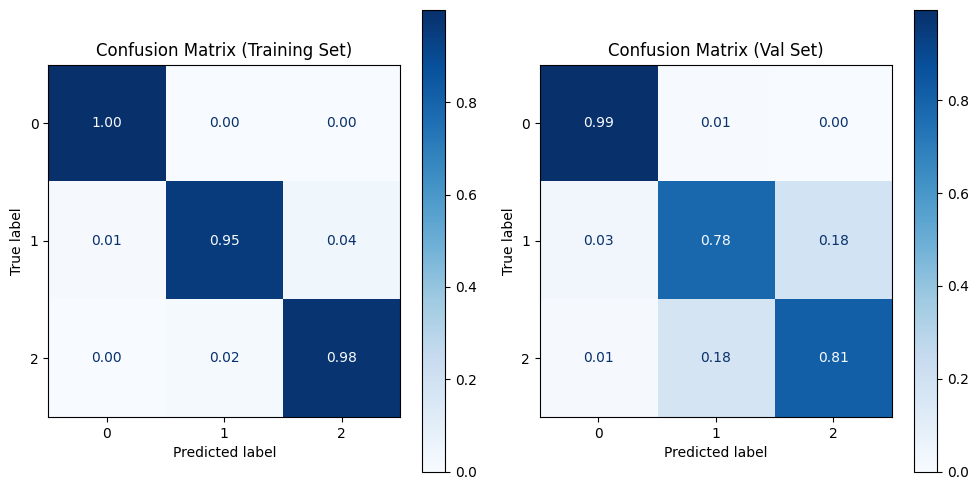

RandomForestClassifier(n_estimators=20, random_state=42)

In [ ]:
# Let's tune RandomForest classifier hyperparameters
rf_param_grid = { 'n_estimators': [20, 50],
                  'max_depth': [None],
                  'min_samples_split': [2, 4],
                  'min_samples_leaf': [1, 2]}

rf_classifier_tuned = RandomForestClassifier(random_state=42)

# Call the function with the Random Forest classifier
train_and_evaluate_model(X_train_final, y_train_final, X_val, y_val, rf_classifier_tuned, rf_param_grid)

 Our tuned Random Froest classifier performed the same with the RF baseline model with accuracy of 98% on training and 86% on the validation set. No improvement here, as seen the best parameters were 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100

### 3. Support Vector Machine

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2996
           1       0.94      0.95      0.95      2993
           2       0.96      0.94      0.95      3035

    accuracy                           0.96      9024
   macro avg       0.96      0.96      0.96      9024
weighted avg       0.96      0.96      0.96      9024

Classification Report (Val Set):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       765
           1       0.79      0.81      0.80       767
           2       0.82      0.78      0.80       725

    accuracy                           0.86      2257
   macro avg       0.86      0.86      0.86      2257
weighted avg       0.86      0.86      0.86      2257



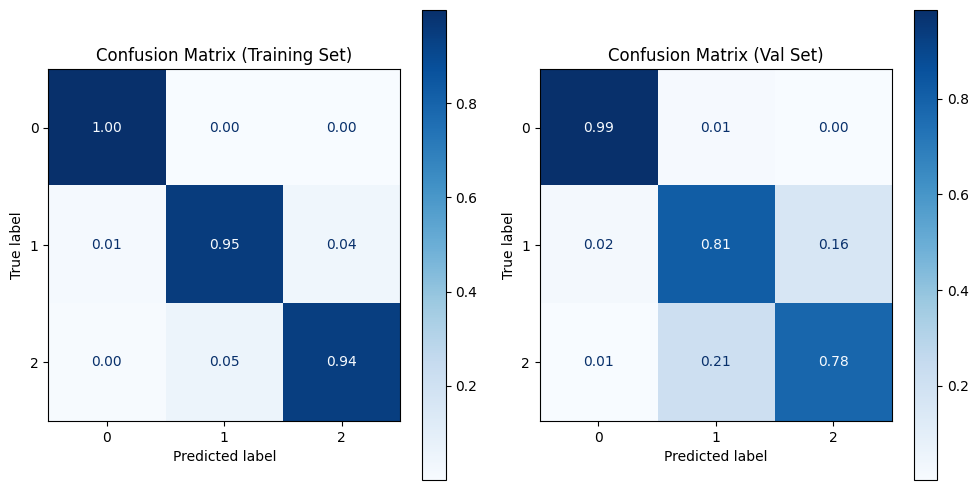

SVC(probability=True, random_state=42)

In [ ]:
#Let's build an SVM model
from sklearn.svm import SVC

# Initialize a Support Vector Machine classifier
svm_classifier = SVC(random_state=42, probability=True)  # Make sure to set probability=True for ROC AUC scoring

# Call the function with the SVM classifier
train_and_evaluate_model(X_train_final, y_train_final, X_val, y_val, svm_classifier)


Our SVM model also performed very well on the training set with an accuracy of 96% and 87% on the unseen dataset. We can still improve the model's ability to generalize data better by tuning it.

###  <b> Tuning SVM model was very resource intensive. It took close to 2 hours to run, hence we had to forego

# Using Deep Learning

In [ ]:
from keras import models, layers  # Import the necessary modules

# Create a Sequential model
model = models.Sequential()

# Input - Layer
model.add(layers.Dense(50, activation = "relu", input_shape=(10292, )))

# Hidden - Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))

# Output - Layer (Note: Use softmax activation for multi-class)
num_classes = 3  # Number of classes (0, 1, 2)
model.add(layers.Dense(num_classes, activation="softmax"))

# Display the summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                514650    
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 3)                 153       
                                                                 
Total params: 519903 (1.98 MB)
Trainable params: 519903 

> The model is designed to classify input data into one of three classes. The ReLU activation functions introduce non-linearity to the network, allowing it to learn complex relationships in the data. The dropout layers help prevent overfitting by randomly deactivating neurons during training.

In [ ]:
# Compile the model for multi-class classification
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",  # Use sparse categorical cross-entropy
    metrics=["accuracy"]
)

In [ ]:
history = model.fit(
    X_train_final, y_train_final,
    epochs=69,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/69
282/282 [==============================] - 6s 16ms/step - loss: 0.7779 - accuracy: 0.6341 - val_loss: 0.4771 - val_accuracy: 0.7895
Epoch 2/69
282/282 [==============================] - 3s 11ms/step - loss: 0.3490 - accuracy: 0.8611 - val_loss: 0.4153 - val_accuracy: 0.8210
Epoch 3/69
282/282 [==============================] - 3s 11ms/step - loss: 0.2181 - accuracy: 0.9201 - val_loss: 0.4538 - val_accuracy: 0.8179
Epoch 4/69
282/282 [==============================] - 4s 13ms/step - loss: 0.1630 - accuracy: 0.9430 - val_loss: 0.4452 - val_accuracy: 0.8325
Epoch 5/69
282/282 [==============================] - 4s 13ms/step - loss: 0.1333 - accuracy: 0.9519 - val_loss: 0.4608 - val_accuracy: 0.8307
Epoch 6/69
282/282 [==============================] - 3s 11ms/step - loss: 0.1206 - accuracy: 0.9539 - val_loss: 0.5143 - val_accuracy: 0.8339
Epoch 7/69
282/282 [==============================] - 3s 11ms/step - loss: 0.1077 - accuracy: 0.9582 - val_loss: 0.5136 - val_accuracy: 0.8383

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 85.09%


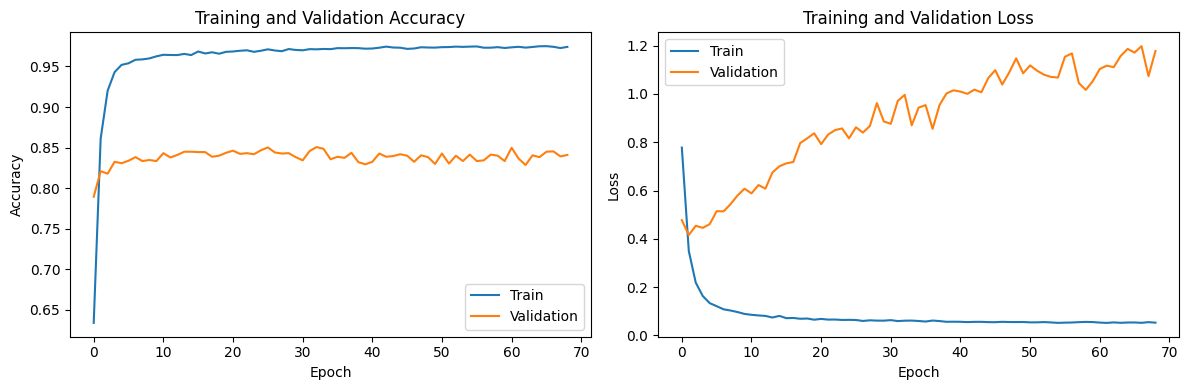

In [ ]:
# Extract training and validation metrics
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a plot for accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Train')
plt.plot(val_accuracy, label='Validation')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Create a plot for loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train')
plt.plot(val_loss, label='Validation')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

The Neural Network performed really well with 85% accuracy. The plot showcasing the learning curve is ideal with both the training and validation curve accuracy increasing with the number of epochs and then later plateaus indicating that the model has learnt from the training data and generalizes well to new data.

The loss curve however, might indicate overfitting with an increasing number of epochs. This is seen as the loss decreases on the training data while increasing on validation data.

### Tuning our Deep Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

# Create a Sequential model
tuned_model = Sequential()

# Input - Layer
tuned_model.add(Dense(50, activation="relu", input_shape=(10292, )))

# Hidden - Layers
tuned_model.add(Dropout(0.5))  # Increased dropout rate
tuned_model.add(Dense(50, activation="relu"))
tuned_model.add(BatchNormalization())  # Batch normalization
tuned_model.add(Dense(50, activation="relu"))

# Output - Layer
num_classes = 3
tuned_model.add(Dense(num_classes, activation="softmax"))

# Compile the model
tuned_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Early stopping callback
early_stopping = EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True)

# Train the model with early stopping
tuned_history = tuned_model.fit(
    X_train_final, y_train_final,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/50
282/282 [==============================] - 6s 16ms/step - loss: 0.8204 - accuracy: 0.5893 - val_loss: 0.8853 - val_accuracy: 0.5618
Epoch 2/50
282/282 [==============================] - 3s 12ms/step - loss: 0.4571 - accuracy: 0.8072 - val_loss: 0.4465 - val_accuracy: 0.8219
Epoch 3/50
282/282 [==============================] - 3s 11ms/step - loss: 0.3510 - accuracy: 0.8611 - val_loss: 0.3816 - val_accuracy: 0.8334
Epoch 4/50
282/282 [==============================] - 3s 11ms/step - loss: 0.2964 - accuracy: 0.8831 - val_loss: 0.3936 - val_accuracy: 0.8440
Epoch 5/50
282/282 [==============================] - 4s 15ms/step - loss: 0.2471 - accuracy: 0.9074 - val_loss: 0.4185 - val_accuracy: 0.8458
Epoch 6/50
282/282 [==============================] - 3s 12ms/step - loss: 0.2275 - accuracy: 0.9167 - val_loss: 0.4050 - val_accuracy: 0.8507
Epoch 7/50
282/282 [==============================] - 3s 11ms/step - loss: 0.2125 - accuracy: 0.9221 - val_loss: 0.4081 - val_accuracy: 0.8476

In [ ]:
scores = tuned_model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 83.00%


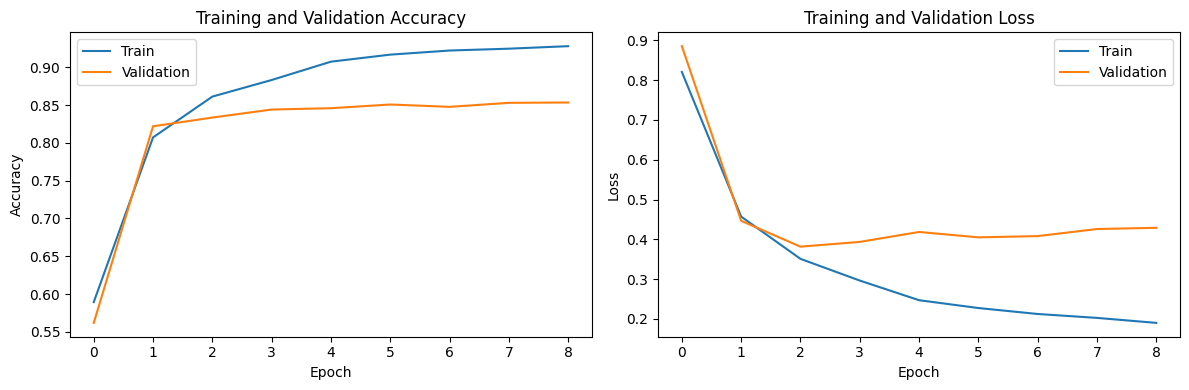

In [ ]:
# Extract training and validation metrics
train_accuracy = tuned_history.history['accuracy']
val_accuracy = tuned_history.history['val_accuracy']
train_loss = tuned_history.history['loss']
val_loss = tuned_history.history['val_loss']

# Create a plot for accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Train')
plt.plot(val_accuracy, label='Validation')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Create a plot for loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train')
plt.plot(val_loss, label='Validation')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

To prevent overfitting we added early stopping to monitor the validation loss during training and stop training once the validation loss starts to increase. This helps prevent the model from overfitting by finding the point where it performs best on the validation set. Also, by adding batch normalization, it helped stabilize training and improve generalization.

Although the accuracy now is at 83%, our model is not overfitted on the training data and would perform better on unseen data.

### Model Evaluation

The tuned Random Forest model appears to be a good candidate. It's yielding competitive accuracy on both the training and validation sets, and the accuracy drop is relatively small, indicating good generalization. It also has a high F1-Score 86% which shows a good balance between precision and recall.

### Final Model

Our final model is the tuned Random forest with best parameters as  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2996
           1       0.98      0.95      0.97      2993
           2       0.96      0.98      0.97      3035

    accuracy                           0.98      9024
   macro avg       0.98      0.98      0.98      9024
weighted avg       0.98      0.98      0.98      9024

Classification Report (Val Set):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1611
           1       0.81      0.78      0.79      1612
           2       0.81      0.82      0.81      1612

    accuracy                           0.86      4835
   macro avg       0.86      0.86      0.86      4835
weighted avg       0.86      0.86      0.86      4835



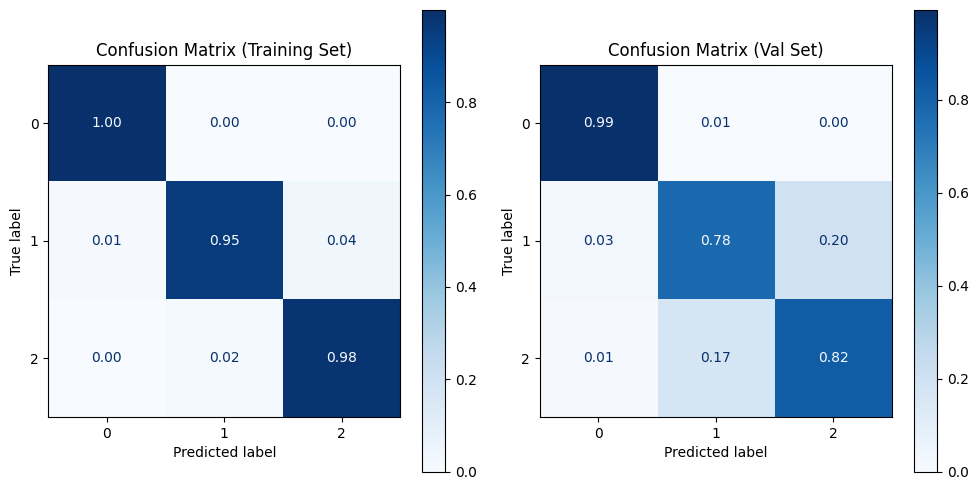

RandomForestClassifier(n_estimators=20, random_state=42)

In [ ]:
# Let's run final model using test set

rf_classifier_tuned = RandomForestClassifier(random_state = 42,
                                             max_depth = None,
                                             min_samples_split = 2,
                                             min_samples_leaf = 1,
                                             n_estimators = 20)

# Call the function with the Random Forest classifier
train_and_evaluate_model(X_train_final, y_train_final, X_test, y_test, rf_classifier_tuned)

## Conclusion

Google and Apple products are vastly used in the world. This study successfully achieved its objectives aimed at understanding the sentiment dynamics surrounding Google and Apple products on Twitter.

Through the development of a specialized sentiment analysis model, we discerned nuanced differences in sentiments between these two tech giants. Our best model was **Random Forest Model** since it displayed a high F1 Score of 86%; It yields a competitive accuracy on both the training and validation sets, and the accuracy drop is relatively small, indicating good generalization.

Our analysis revealed varying degrees of positivity and negativity in the Twitter discussions concerning their products, shedding light on the overall inclusive sentiment view towards both brands.  Additionally, by investigating recurring topics associated with positive and negative sentiments using a word cloud for each sentiment, we gained valuable insights into the prevailing themes that influence public perception of Google and Apple. This research contributes to a deeper comprehension of how sentiments and topics converge to shape the online discourse surrounding these companies, offering a valuable resource for both academia and industry.

## Recommendations For Our Stakeholders

* Craft marketing messages that align with the predominant sentiments expressed by consumers. Tailor your messages to resonate with the positive aspects and address concerns highlighted in sentiment analysis.
* Collaborate with influencers who align with the positive sentiments around your brand. Their endorsement can amplify positive sentiment and reach a wider audience.
* Regularly assess the impact of your marketing strategies on sentiment trends. Track changes in sentiment over time to gauge the effectiveness of your efforts and make data-driven adjustments

## NextSteps

1. Incorporate more advanced natural language processing techniques and machine learning algorithms to enhance the accuracy of sentiment classification. Note that the project is resource intensive, having GPUs will reduce model runtime
2. Extend the analysis over a longer time period to observe trends and changes in sentiment over time. This can provide deeper insights into the effects of product launches, events, and other external factors on public sentiment.
3. Collaborate with data scientists and NLP experts to continually refine the sentiment analysis model. This will ensure accurate classification of sentiment in tweets, enabling the agency to deliver high-quality insights to clients.
4. Analyze sentiment based on user demographics such as age, gender, and location. This helps tailor marketing strategies to specific consumer segments and craft messaging that resonates with different groups.
5. Develop predictive models to anticipate shifts in sentiment. This proactive approach allows the agency to advise clients on adjusting their strategies ahead of sentiment fluctuations.
6. Work closely with clients to integrate sentiment insights from customers into their marketing strategies. Collaborate on content creation, social media campaigns, and product messaging based on sentiment trends.

### Comments

Good work, Check the highlights: <br>
* 1. Good background/business understanding.
* 2. There's no problem statement, methodology, metric of success etc.
* 3. You could have dug deeper into I can't tell the class to see whether it can be classified as positive, neutral, or negative.
* 4. EDA comes after cleaning has been done, i.e after removing stopwords, punctuations, etc.
* 5. More EDA could have checked the word count.
* 6. Well done on rectifying class imbalance, however, you could have gone ahead to model with class imbalanced data first.
* 7. We do a grid-search in the model tuning stage. I expected the see the base model. Ensure to recreate the model with the best params.
* 8. This is a classification problem and the metrics could have been either precision, recall, or f1 score instead of relying on accuracy alone.
* 9. Always scale your train data especially when using a counter vectorizer or TF-IDF. I expected you to try using frequency (counter vectorizer) before trying tf-idf. Remember we talked about using these 2 and the 3rd being word2vec embedding with uses cosine similarity.
* 10. sequential rnn model architecture was well stated. Good work. however the epoch number could have been increased in the 1st model and increase early stoping patience layer to 7 or 6.
* 11. slides were crowded but I loved the recommendation.
